In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.metrics.pairwise import cosine_similarity
from scipy.spatial.distance import euclidean, cityblock
from scipy.spatial import minkowski_distance
from math import log2, sqrt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, MinMaxScaler

plt.style.use('https://gist.githubusercontent.com/peterphot/0d2645b0ced93c3cc71d31695ad1a5ae/raw/33cbe89d779b61ef5532272c5cdc0c1f2c56a357/matplotlibrc_dumbestwaytoconfigever')
matplotlib.rcParams['font.family'] = 'DejaVu Sans'

In [ ]:


vec_means_df = _deepnote_execute_sql("""select
    *
from detect.vector_means
""", 'SQL_52793694_A2B5_4D65_AC5F_FD0AE09C38F6')
vec_means_df

,cluster_id,populate_cities_dropdown,search_horse,search_race_info,search_race_result,show_classes,show_distances,show_earnings,show_places,show_start_gates,view_horses,view_index,view_races
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.150001,0.849999,0.000000
1,1,0.277831,0.174511,0.222829,0.066338,0.003390,0.000000,0.003800,0.000000,0.009427,0.069852,0.080286,0.091735
2,2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
3,3,0.000000,0.300491,0.000000,0.000000,0.082697,0.090225,0.114929,0.080995,0.079818,0.131024,0.119819,0.000000
4,4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
5,5,0.180629,0.231145,0.123964,0.045712,0.027582,0.035183,0.044857,0.038019,0.023541,0.090011,0.074556,0.084801


In [ ]:
vec_means_df = vec_means_df.set_index('cluster_id')

This next query would be replaced with the data from the user we are trying to match. The cluster this is in should be unknown

In [ ]:


matching_df = _deepnote_execute_sql("""select
    *
from detect.array_vectors
where true
""", 'SQL_52793694_A2B5_4D65_AC5F_FD0AE09C38F6')
matching_df

,session_id,source_ip,event_name_vector,prop_vector,n_vector
0,02db048aaab07793c2165c37b7539e79,149.167.134.218,"[populate_cities_dropdown, search_horse, searc...","[0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, ...","[0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0]"
1,072306ca06752fd860948de351af0420,149.167.134.218,"[populate_cities_dropdown, search_horse, searc...","[0.1111111111111111, 0.2222222222222222, 0.111...","[1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1]"
2,079d831c61ec7fea769dbf1101ac88b8,149.167.134.218,"[populate_cities_dropdown, search_horse, searc...","[0.0, 0.4, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, ...","[0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0]"
3,07eaa3e7d914bee1a42eb0301ca65f09,220.244.53.30,"[populate_cities_dropdown, search_horse, searc...","[0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, ...","[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]"
4,082b18bb7c35d05b34a68ef964d176f8,149.167.134.218,"[populate_cities_dropdown, search_horse, searc...","[0.07142857142857142, 0.35714285714285715, 0.0...","[4, 20, 3, 2, 1, 2, 11, 2, 4, 3, 3, 1]"
...,...,...,...,...,...
201,f3f1c3a505b79a235fff50c88d666cf4,149.167.134.218,"[populate_cities_dropdown, search_horse, searc...","[0.0, 0.25, 0.0, 0.0, 0.1875, 0.0, 0.1875, 0.1...","[0, 4, 0, 0, 3, 0, 3, 2, 2, 1, 1, 0]"
202,f648c3416d0e80cceecbc8081ddb7e1a,149.167.134.218,"[populate_cities_dropdown, search_horse, searc...","[0.34782608695652173, 0.17391304347826086, 0.2...","[8, 4, 5, 1, 1, 0, 1, 0, 0, 1, 1, 1]"
203,f7d429ae114c4ff09d8476e0f8fe91c7,149.167.134.218,"[populate_cities_dropdown, search_horse, searc...","[0.0, 0.2222222222222222, 0.0, 0.0, 0.33333333...","[0, 2, 0, 0, 3, 0, 0, 0, 2, 1, 1, 0]"
204,f939175edf8f72a845a729c3bab39787,149.167.134.218,"[populate_cities_dropdown, search_horse, searc...","[0.0, 0.25, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0....","[0, 2, 0, 0, 1, 0, 0, 0, 3, 1, 1, 0]"


In [ ]:
matching_df['prop_vector'] = matching_df['prop_vector'].apply(lambda x: np.asarray(x, dtype=float))
matching_df['n_vector'] = matching_df['n_vector'].apply(lambda x: np.asarray(x, dtype=float))
closest_clusters = [np.argmax(cosine_similarity(row['prop_vector'].reshape(1,-1), vec_means_df.to_numpy())) for i, row in matching_df.iterrows()]

In [ ]:
matching_df['closest_cluster'] = closest_clusters

In [ ]:


population_df = _deepnote_execute_sql("""select
    av.session_id
    , av.source_ip
    , av.event_name_vector
    , av.prop_vector
    , av.n_vector
    , cs.cluster_id
from detect.array_vectors av
join detect.cluster_sessions cs
    on av.session_id = cs.session_id
where True
""", 'SQL_52793694_A2B5_4D65_AC5F_FD0AE09C38F6')
population_df

,session_id,source_ip,event_name_vector,prop_vector,n_vector,cluster_id
0,02db048aaab07793c2165c37b7539e79,149.167.134.218,"[populate_cities_dropdown, search_horse, searc...","[0.0, 0.4, 0.0, 0.0, 0.0, 0.0, 0.2, 0.0, 0.0, ...","[0, 2, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0]",3
1,072306ca06752fd860948de351af0420,149.167.134.218,"[populate_cities_dropdown, search_horse, searc...","[0.1111111111111111, 0.2222222222222222, 0.111...","[1, 2, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1]",5
2,079d831c61ec7fea769dbf1101ac88b8,149.167.134.218,"[populate_cities_dropdown, search_horse, searc...","[0.0, 0.4, 0.0, 0.0, 0.2, 0.0, 0.0, 0.0, 0.0, ...","[0, 2, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0]",3
3,07eaa3e7d914bee1a42eb0301ca65f09,220.244.53.30,"[populate_cities_dropdown, search_horse, searc...","[0.0, 0.3333333333333333, 0.0, 0.0, 0.0, 0.0, ...","[0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0]",3
4,082b18bb7c35d05b34a68ef964d176f8,149.167.134.218,"[populate_cities_dropdown, search_horse, searc...","[0.07142857142857142, 0.35714285714285715, 0.0...","[4, 20, 3, 2, 1, 2, 11, 2, 4, 3, 3, 1]",5
...,...,...,...,...,...,...
200,f3f1c3a505b79a235fff50c88d666cf4,149.167.134.218,"[populate_cities_dropdown, search_horse, searc...","[0.0, 0.25, 0.0, 0.0, 0.1875, 0.0, 0.1875, 0.1...","[0, 4, 0, 0, 3, 0, 3, 2, 2, 1, 1, 0]",3
201,f648c3416d0e80cceecbc8081ddb7e1a,149.167.134.218,"[populate_cities_dropdown, search_horse, searc...","[0.34782608695652173, 0.17391304347826086, 0.2...","[8, 4, 5, 1, 1, 0, 1, 0, 0, 1, 1, 1]",1
202,f7d429ae114c4ff09d8476e0f8fe91c7,149.167.134.218,"[populate_cities_dropdown, search_horse, searc...","[0.0, 0.2222222222222222, 0.0, 0.0, 0.33333333...","[0, 2, 0, 0, 3, 0, 0, 0, 2, 1, 1, 0]",3
203,f939175edf8f72a845a729c3bab39787,149.167.134.218,"[populate_cities_dropdown, search_horse, searc...","[0.0, 0.25, 0.0, 0.0, 0.125, 0.0, 0.0, 0.0, 0....","[0, 2, 0, 0, 1, 0, 0, 0, 3, 1, 1, 0]",3


In [ ]:
population_df['prop_vector'] = population_df['prop_vector'].apply(lambda x: np.asarray(x, dtype=float))
population_df['n_vector'] = population_df['n_vector'].apply(lambda x: np.asarray(x, dtype=float))

In [ ]:
def cross_entropy(p, q):
	return -sum([q[i]*log2(q[i]/p[i]) for i in range(len(q))]) 

entropies = []
similarities = []
seshes = []

for i, row in matching_df.iterrows():
    # scaler = StandardScaler()
    scaler = MinMaxScaler()
    ci = row['closest_cluster']
    temp = population_df.query(f'cluster_id == {ci}')
    scaled_pop_n_vec = scaler.fit_transform(temp['n_vector'].tolist())
    
    entropies.append([cross_entropy(a+0.00000000001, row['prop_vector']+0.00000000001) for a in temp['prop_vector'].to_numpy()])    
    similarities.append([euclidean(a.reshape(1,-1), scaler.transform(row['n_vector'].reshape(1,-1))) for a in scaled_pop_n_vec])
    seshes.append(temp['session_id'].to_numpy())

In [ ]:
flat_entropies = [item for sublist in entropies for item in sublist]
flat_similarities = [item for sublist in similarities for item in sublist]

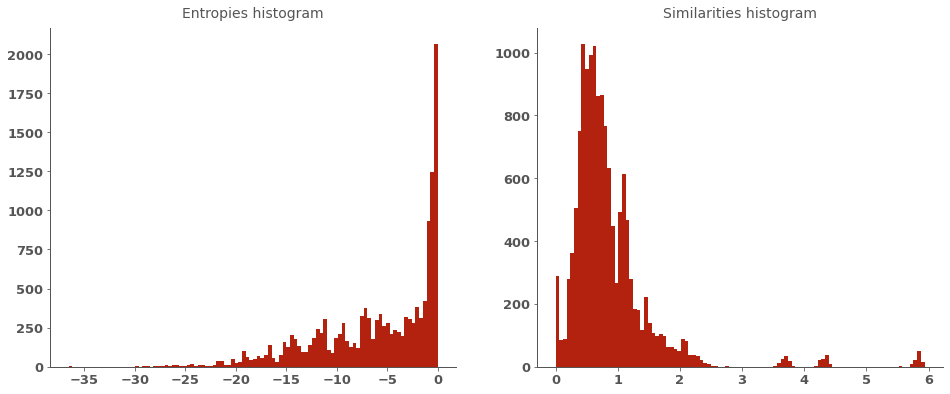

In [ ]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
plt.hist(flat_entropies, bins= 100)
plt.title('Entropies histogram')
plt.subplot(1,2,2)
plt.hist(flat_similarities, bins= 100)
plt.title('Similarities histogram')
plt.show()

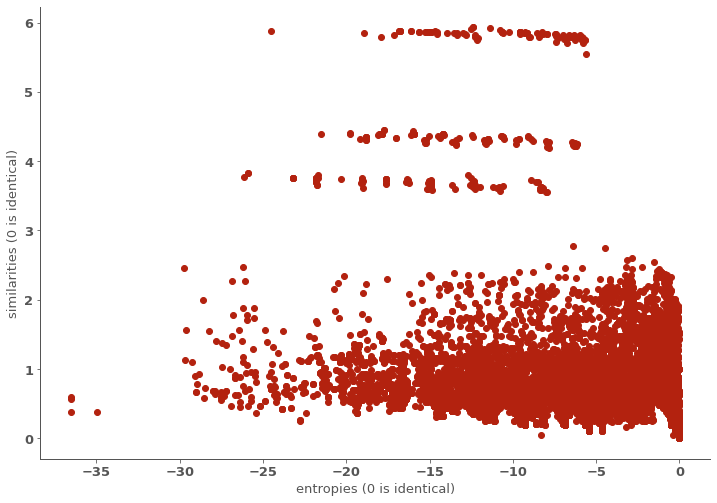

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(flat_entropies, flat_similarities)
plt.xlabel('entropies (0 is identical)')
plt.ylabel('similarities (0 is identical)')
plt.show()

In [ ]:
gmm = GaussianMixture(2, covariance_type='full', random_state=0)
mod = gmm.fit_predict(list(zip(flat_entropies, flat_similarities)))

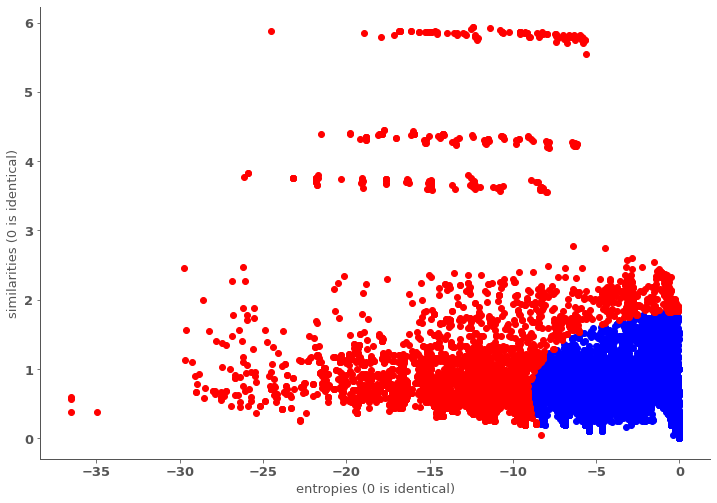

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(np.array(flat_entropies)[mod == 0], np.array(flat_similarities)[mod == 0], color='b')
plt.scatter(np.array(flat_entropies)[mod == 1], np.array(flat_similarities)[mod == 1], color='r')
plt.xlabel('entropies (0 is identical)')
plt.ylabel('similarities (0 is identical)')
plt.show()

In [ ]:
gmm.means_
gmm.covariances_

array([[[8.12077454e+00, 4.00923838e-03],
        [4.00923838e-03, 1.49182504e-01]],

       [[2.94686617e+01, 6.71715881e-01],
        [6.71715881e-01, 1.00389730e+00]]])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=26f60d54-40d9-464e-9cf2-413fca0d13e5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>